<a href="https://www.kaggle.com/code/xcufx0qc2os1/covid-19-data-eda?scriptVersionId=109006786" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid19-data/Covid data/CovidVaccinations.csv
/kaggle/input/covid19-data/Covid data/CovidDeaths.csv


# EDA of Deaths Associated with COVID - 19

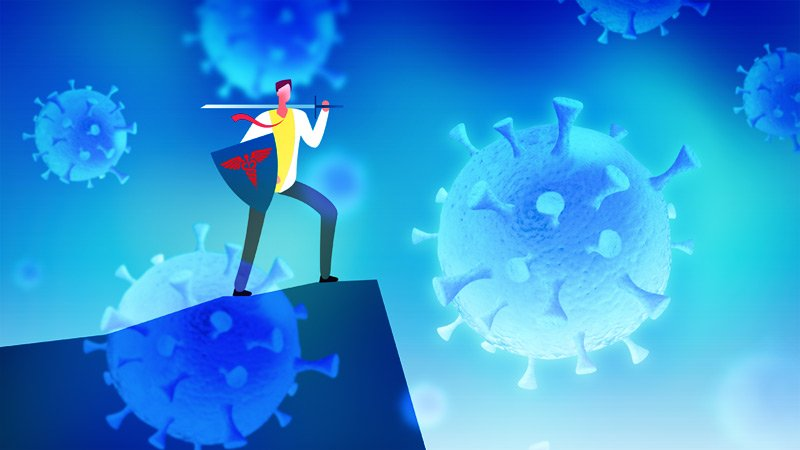

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:lightgreen;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;"> 🙏 
   <span style="color:blue;font-size:18px;"> WELCOME </span>
    <span style="color:red;font-size:18px;"> Introduction to covid 19 pandemic</span>
    <span style="color:crimson;font-size:18px;">What is Covid- 19? : SARS CoV2 is a virus from the family Coronaviridae that causes the disease COVID-19. The virus is classified as a positive sense single-stranded RNA virus. This means that it can be present in both RNA and DNA forms, but the RNA form is the one associated with the infectious disease. SARS-CoV-2 virus (Severe Acute Respiratory Syndrome - Corona Virus 2) is transmitted person to person through respiratory droplets and is spread through contact with contaminated surfaces, objects, or respiratory secretions. It is estimated that only about 5% to 10% is infectious. It has emrged as a global pandemic and a major public health crisis causing millions of deaths worldwide due to which the world all over witnessed an unprecidented lockdown and restrictions.  </span>

</p>
</div>


***


## <center>Importing Data</center>

In [2]:
deaths = pd.read_csv("../input/covid19-data/Covid data/CovidDeaths.csv")


## <center>Importing Libraries</center>

In [3]:
import plotly.express as px
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
import missingno as msno
%matplotlib inline

# <center>Exploratory Data Analysis of Deaths due to Covid</center>

### Preliminary Analysis

In [4]:
df = deaths.copy(deep=True)
df.head()

,iso_code,continent,location,date,population,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests
0,AFG,Asia,Afghanistan,24-02-20,40099462.0,5.0,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,25-02-20,40099462.0,5.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,26-02-20,40099462.0,5.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,27-02-20,40099462.0,5.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,28-02-20,40099462.0,5.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.shape

(214716, 27)

In [6]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'population',
       'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths',
       'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests'],
      dtype='object')

In [7]:
df.describe()

,population,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,...,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests
count,2.134550e+05,2.057990e+05,2.055670e+05,2.043850e+05,1.869840e+05,186929.000000,185754.000000,204855.000000,204623.000000,203446.000000,...,161210.000000,27457.000000,27457.000000,30187.000000,30187.000000,7062.000000,7062.000000,13970.000000,13970.000000,7.938700e+04
mean,1.427552e+08,4.078681e+06,1.258980e+04,1.262519e+04,7.140379e+04,144.545458,145.292120,54232.246263,189.262622,189.669687,...,0.955729,847.760425,21.406429,4189.359559,158.392843,430.016426,13.343377,5618.429563,98.887719,2.110457e+07
std,6.949778e+08,2.556119e+07,8.676016e+04,8.482775e+04,3.686606e+05,748.968482,734.415134,97922.768587,944.673409,621.871801,...,0.378471,2500.889583,26.402313,10879.373066,193.327584,586.959351,15.246042,13498.186641,99.251151,8.409869e+07
min,4.700000e+01,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.001000,0.000000,0.000000,...,-0.060000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,8.960070e+05,3.806500e+03,0.000000e+00,6.714000e+00,1.070000e+02,0.000000,0.143000,961.752000,0.000000,1.457000,...,0.770000,31.000000,3.887000,167.000000,32.456500,41.000000,3.512500,377.250000,28.576250,3.646540e+05
50%,7.425058e+06,4.480400e+04,6.100000e+01,9.957100e+01,1.091000e+03,1.000000,1.714000,9145.694000,8.692000,20.222000,...,0.970000,157.000000,10.981000,811.000000,89.646000,196.000000,8.072000,1341.000000,71.816000,2.067330e+06
75%,3.357387e+07,4.807570e+05,9.990000e+02,1.157857e+03,9.327000e+03,15.000000,16.714000,65702.968500,101.563500,137.672500,...,1.160000,590.000000,29.940000,3203.500000,203.341000,584.750000,17.453250,5298.750000,132.937500,1.024845e+07
max,7.909295e+09,6.067716e+08,4.081701e+06,3.436129e+06,6.507544e+06,17737.000000,14858.143000,655309.333000,195005.313000,35258.843000,...,6.090000,28891.000000,180.387000,154513.000000,1546.501000,4838.000000,222.900000,153988.000000,666.289000,9.214000e+09


In [8]:
#converting date to datetime type
df.date = pd.to_datetime(df.date)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214716 entries, 0 to 214715
Data columns (total 27 columns):
 #   Column                              Non-Null Count   Dtype         
---  ------                              --------------   -----         
 0   iso_code                            214716 non-null  object        
 1   continent                           202342 non-null  object        
 2   location                            214716 non-null  object        
 3   date                                214716 non-null  datetime64[ns]
 4   population                          213455 non-null  float64       
 5   total_cases                         205799 non-null  float64       
 6   new_cases                           205567 non-null  float64       
 7   new_cases_smoothed                  204385 non-null  float64       
 8   total_deaths                        186984 non-null  float64       
 9   new_deaths                          186929 non-null  float64       
 10  new_deat

<AxesSubplot:>

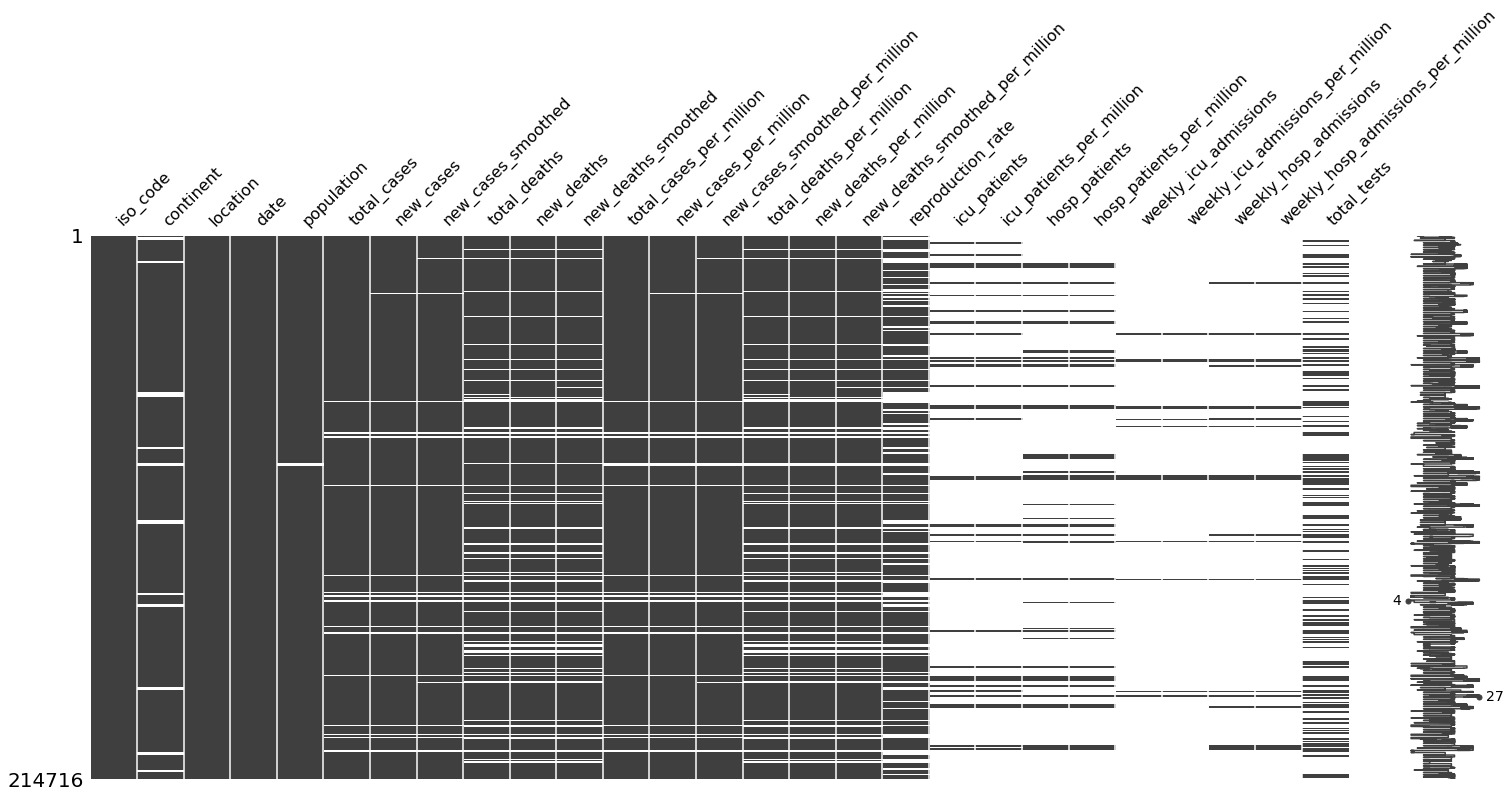

In [10]:
#missing values matrix
msno.matrix(df)

In [11]:
#missing value quantification
df.isnull().sum()

iso_code                                   0
continent                              12374
location                                   0
date                                       0
population                              1261
total_cases                             8917
new_cases                               9149
new_cases_smoothed                     10331
total_deaths                           27732
new_deaths                             27787
new_deaths_smoothed                    28962
total_cases_per_million                 9861
new_cases_per_million                  10093
new_cases_smoothed_per_million         11270
total_deaths_per_million               28663
new_deaths_per_million                 28718
new_deaths_smoothed_per_million        29888
reproduction_rate                      53506
icu_patients                          187259
icu_patients_per_million              187259
hosp_patients                         184529
hosp_patients_per_million             184529
weekly_icu

In [12]:
## time frame of the entire df
print(df.date.min(),df.date.max())

2020-01-01 00:00:00 2022-12-08 00:00:00


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:lightgrey;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
​
<p style="padding: 10px;
              color:white;"> 
     📌 <span style="color:red;font-size:18px;"> Observations from preliminary analysis</span>
    <span style="color:blue;font-size:18px;"> 1.There are 214716 observations and 27 features. 2. The data starts from Jan of 2020 and ends at Dec 2022 (close to 3 years span). 3. All variables are on continous scale save for id_code, continent, location and date. 4. The information provided includes but not limited to total deaths, total cases reported , new cases , new deaths , reproductive rates, hospital admission , icu admission and total tests done to name a few. 5. All the continous variables show the presence of null values with icu and hospital admissions data showing high degree of missing data, so i humbly plan to stop with EDA and not venture further </span>
​
</p>
</div>

****

## <center>Covid death univariate analysis </center>

### <center>TOTAL NUMBER OF DEATHS AMONG ALL CONTINENTS</center>

In [13]:
fig = px.histogram(df.sort_values('total_deaths', ascending =False).dropna() ,x = 'continent' , y= 'total_deaths',color = 'continent',color_discrete_sequence=px.colors.qualitative.G10)
fig.update_layout(title = 'CONTINENT BASED COVID DEATHS' ,yaxis_title = 'TOTAL NUMBER OF DEATHS',xaxis_title = "CONTINENTS")
fig.layout.update(showlegend = False)
fig.show()

### <center>TOTAL NUMBER OF DEATHS AMONG ALL COUNTRIES</center>

In [14]:
fig = px.histogram(df.sort_values('total_deaths', ascending =False).dropna() ,x = 'location' , y= 'total_deaths',color = 'location',color_discrete_sequence=px.colors.qualitative.G10)
fig.update_layout(title = 'COUNTRY BASED COVID DEATHS' ,yaxis_title = 'TOTAL NUMBER OF DEATHS',xaxis_title = "COUNTRIES")
fig.layout.update(showlegend = False)
fig.show()

### <center>TOTAL NUMBER OF DEATHS DISTRIBUTED OVER TIME</center>

In [15]:
fig = px.line(df.sort_values('date').dropna() ,x = 'date' , y= 'total_deaths',color = 'location',color_discrete_sequence=px.colors.qualitative.G10)
fig.update_layout(title = 'TIME BASED COVID DEATHS' ,yaxis_title = 'TOTAL NUMBER OF DEATHS',xaxis_title = "DATES")
fig.layout.update(showlegend = True)
fig.show()

### <center>DATA CORRELATION MATRIX</center>

In [16]:
fig = px.imshow(df.corr().round(3),text_auto=True)
fig.update_layout(width = 1000, height = 1000)

## <center>QUESTION TIME!!</center>

### <center>WHAT IS THE RELATIONSHIP BETWEEN TOTAL CASES REPORTED AND NUMBER OF COVID DEATHS?</center>

In [17]:
fig = px.histogram (df.dropna(),x = ['total_cases'] ,y ='total_deaths',hover_data=['new_cases'],color = 'location' , marginal='rug')
fig.update_layout(title = 'TOTAL CASES vs COVID DEATHS' ,yaxis_title = 'SUM TOTAL OF DEATHS',xaxis_title = "TOTAL CASES REPORTED")
fig.layout.update(showlegend = True)
fig.show()

 ### <center>WHAT IS THE RELATIONSHIP BETWEEN TOTAL TESTS CONDUCTED AND NUMBER OF COVID DEATHS?</center>

In [18]:
fig = px.histogram (df.dropna(),x = ['total_tests'] ,y ='total_deaths',hover_data=['new_cases'],color = 'location' , marginal='rug')
fig.update_layout(title = 'TOTAL TESTS CONDUCTED vs COVID DEATHS' ,yaxis_title = 'SUM TOTAL OF DEATHS',xaxis_title = "TOTAL TESTS CONDUCTED")
fig.layout.update(showlegend = True)
fig.show()

### <center>IS IT POSSIBLE TO FIND THE DATA FOR A SPECIFIC COUNTRY OF INTEREST?</center>

#### CREATING A CUSTOM FUNCTION WHICH RETURNS A SCATTER PLOT CONTAINING TOTAL TESTS CONDUCTED AND NUMBER OF DEATHS REPORTED FOR A SPECIFIC COUNTRY
####    cov_country()

In [19]:
def cov_country(x):
    df_country = df[df.location == x]
    fig = px.scatter(df_country.sort_values('total_deaths', ascending =False).dropna() ,x = 'total_cases' , y= 'total_deaths',color = 'new_deaths',color_discrete_sequence=px.colors.qualitative.G10, hover_data=['population','total_cases','new_cases','icu_patients','hosp_patients'])
    fig.update_layout(title = 'TOTAL CASES REPORTED vs COVID DEATHS FOR '+ x.upper() ,yaxis_title = 'SUM TOTAL OF DEATHS',xaxis_title = "TOTAL TESTS CONDUCTED")
    fig.show()

#### It accepts the following country names as input 

In [20]:
df.location.unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethi

#### Example: using the function to find out data for Slovenia
     P.S : HOVERING OVER THE GRAPH REVEALS MORE DETAILS

In [21]:
cov_country('Slovenia')

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:lightblue;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
•
<p style="padding: 10px;
              color:white;"> 
     📌💀 <span style="color:red;font-size:18px;"> FINAL THOUGHTS</span>
    <span style="color:blue;font-size:18px;"> 1.The covid deaths seem to be concentrated mainly in Europe (220 million vs 4.3 million in Asia) ⚠ which seems a little ironic as being a physician myself i can certainy say there were lot many cases in India alone which is easily above the asia figures.2. In Europe , Italy🍕 has faced the severe wrath of Covid-19. 3.On examining the correlation plot🗺 the following features show good degree of positive correlation namely  - Population , Total Cases, New cases ,Total deaths , New deaths and Tests done , these may be of interest in feature engineering and i leave it to discretion of the reader.4. Maximum deaths occured till the total cases reported 1O million and till the total tests done reached 100 million - This is perfectly understable as the number of deaths were very high at the start of the pandemic and it is lessned with passage of time. 🙏 </span>
•
</p>
</div>

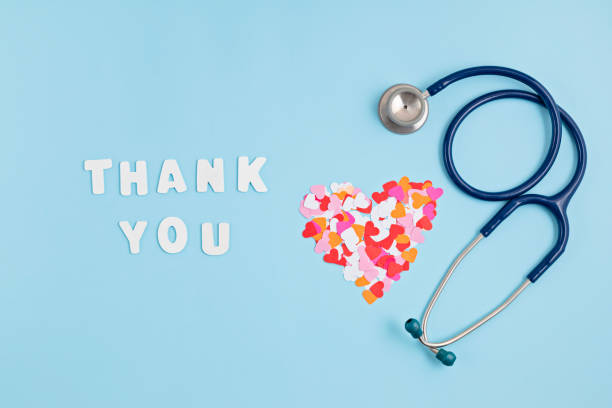